<a href="https://colab.research.google.com/github/Ma0nn/Machiine_Learning/blob/main/Domingo_Matteo_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

TP Machine learning
Le TP sera réalisé dans un notebook python (google collab ou jupyter...)
 Il sera uploadé sur git et le lien transmis à votre encadrant

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

df = pd.read_csv("/content/dataset.csv")
df.head()


,ID,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),...,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,0,F,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,...,12.9,1.0,0.7,18.0,19.0,27.0,Y,0,Y,0
1,1,F,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,...,12.7,1.0,0.6,22.0,19.0,18.0,Y,0,Y,0
2,2,M,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,...,15.8,1.0,1.0,21.0,16.0,22.0,Y,0,N,1
3,3,M,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,...,14.7,1.0,1.0,19.0,26.0,18.0,Y,0,Y,0
4,4,F,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,...,12.5,1.0,0.6,16.0,14.0,22.0,Y,0,N,0


Partie 1 : Analyse Exploratoire des Données (EDA)
Objectif : Comprendre les données et leur structure, identifier les patterns et les problèmes potentiels.

1.1 Vue d'ensemble des données :
Charger le jeu de données dans un dataframe pandas et afficher les premières lignes.

Questions :

Quelles sont les différentes colonnes du jeu de données ?


In [43]:
for col in df.columns:
    print(col)

ID
gender
age
height(cm)
weight(kg)
waist(cm)
eyesight(left)
eyesight(right)
hearing(left)
hearing(right)
systolic
relaxation
fasting blood sugar
Cholesterol
triglyceride
HDL
LDL
hemoglobin
Urine protein
serum creatinine
AST
ALT
Gtp
oral
dental caries
tartar
smoking


Combien y a-t-il d'entrées dans le jeu de données ?


In [44]:
input = len(df)

print(f'le dataset possède {input} entrées.')

le dataset possède 55702 entrées.


Le jeu de données contient-il des valeures nulles ? Si oui combien ?

In [45]:
df.isnull().sum()

valeurs_nulles = df.isnull().sum().sum()

print(f'le dataset possède {valeurs_nulles} valeurs nulles.')
print(df)

le dataset possède 12 valeurs nulles.
          ID gender   age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  \
0          0      F  40.0         155        60.0       81.3             1.2   
1          1      F  40.0         160        60.0       81.0             0.8   
2          2      M  55.0         170        60.0       80.0             0.8   
3          3      M  40.0         165        70.0       88.0             1.5   
4          4      F  40.0         155        60.0       86.0             1.0   
...      ...    ...   ...         ...         ...        ...             ...   
55697  55676      F   NaN         170         NaN       75.0             0.9   
55698  55681      F   NaN         160         NaN       70.0             1.2   
55699  55683      F   NaN         160         NaN       68.5             1.0   
55700  55684      M   NaN         165         NaN       78.0             0.8   
55701  55691      M   NaN         160         NaN       85.0             0.9   

 

1.2 Statistiques descriptives :
Générer des statistiques descriptives pour le jeu de données. Questions :

Quelle est la moyenne d'âge, de taille et de poids des fumeurs ?

In [46]:
print("age moyen :",df.loc[df['smoking'] == 1, 'age'].mean() )
print("taille moyenne :",df.loc[df['smoking'] == 1, 'height(cm)'].mean() )
print("poids moyen :",df.loc[df['smoking'] == 1, 'weight(kg)'].mean() )

age moyen : 43.560813453265546
taille moyenne : 169.4354010852031
poids moyen : 70.95937622213532


Y a-t-il des motifs ou des valeurs aberrantes notables dans les données ? (Un age 200 ans par exemple)

In [47]:
print("valeurs d'age aberrantes :\n",df.loc[(df["age"] < 10) | (df["age"] > 100), 'age'])

valeurs d'age aberrantes :
 55692      180.0
55693     1200.0
55694     3000.0
55695    40000.0
Name: age, dtype: float64


Quelle est l'écart type de l'hémoglobine ?

In [48]:
print("écart type de l'hémoglobine : \n",df['hemoglobin'].std())

écart type de l'hémoglobine : 
 1.5644757507736968


1.3 Distribution de la donnée :
question

Combien y a-il de fumeur vs non-fumeur ? Le résultat doit être présenté sous forme de "pie chart"

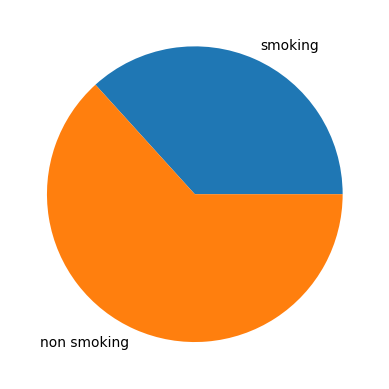

In [49]:
count =df["smoking"].value_counts()
labels= ["smoking","non smoking"]
size=[count[1],count[0]]
plt.pie(size,labels=labels)
plt.show()

Combien d'hommes? sont fumeurs ? Combien de femmes ? Afficher un histogramme

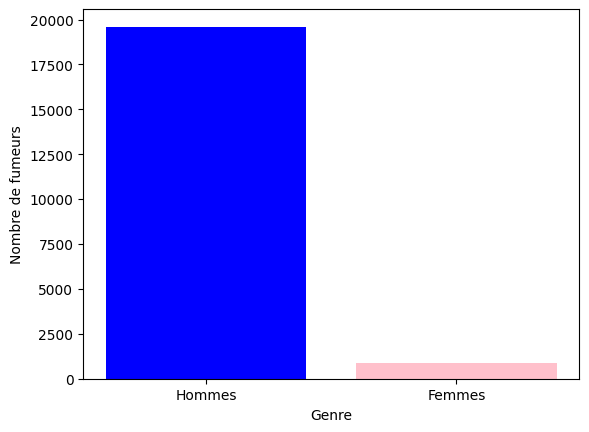

In [50]:
homme_f = df[(df['gender'] == 'M') & (df['smoking'] == 1)].shape[0]
femme_f = df[(df['gender'] == 'F') & (df['smoking'] == 1)].shape[0]


categories = ['Hommes', 'Femmes']
nombre_f = [homme_f, femme_f]

plt.bar(categories, nombre_f, color=['blue', 'pink'])
plt.xlabel('Genre')
plt.ylabel('Nombre de fumeurs')

plt.show()

Quelle est la moyenne d'age des hommes fumeurs ?

In [51]:
print("moyenne d'age pour les hommes fumeurs :",df[(df['gender'] == "M") & (df['smoking'] == 1)]['age'].mean())

moyenne d'age pour les hommes fumeurs : 43.437005664132265


1.4 Analyse de corrélation :
Calculer et visualiser la matrice de corrélation, le but étant d'étudier la corrélation des variables entre elles. Questions :

Quel problème rencontrez-vous ?

Passez à la partie 2 et revenez aux questions suivante plus tard.

Partie 2 : Data pre-processing
Objectif : Préparer les données en traitant les valeurs manquantes, en encodant les variables catégorielles et en normalisant les variables numériques.

2.1 Gestion des Valeurs Manquantes :
Décider d'une stratégie pour gérer les valeurs manquantes (par exemple, suppression, estimation). Implémenter la stratégie choisie.

Questions :

Quelle méthode avez-vous choisie pour gérer les valeurs manquantes et pourquoi ?

On va utiliser le remplacement des valeurs manquantes par la valeur moyenne et remplacer les string par des int correspondant à un label.

Comment cette méthode impacte-t-elle les données ?


NaN ->
la variance est plus petite
conforte le model dans sa prediction,
incertaint

string->int :
ça ne change rien car les variables ou on a des str à la place des int ne comporte que oui ou non.

2.2 Encodage des catégories
Encodez les variables en utilisant un OneHotEncorer

tartare
gender
oral
Questions :

Quel autre traitement de la donnée pourriez-vous faire pour optimiser l'entraînement ?

In [52]:

df = df.dropna(how='any')


In [53]:
encoder = OneHotEncoder()


def encode_and_replace(df, column):

    encoded = encoder.fit_transform(df[[column]]).toarray()
    columns = encoder.get_feature_names_out([column])

    df_encoded = pd.DataFrame(encoded, columns=columns, index=df.index)
    df.drop(column, axis=1, inplace=True)
    df = pd.concat([df, df_encoded], axis=1)
    return df


df = encode_and_replace(df, 'tartar')
df = encode_and_replace(df, 'gender')
df = encode_and_replace(df, 'oral')

df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,tartar_N,tartar_Y,gender_F,gender_M,oral_Y
0,0,40.0,155,60.0,81.3,1.2,1.0,1.0,1.0,114.0,...,18.0,19.0,27.0,0,0,0.0,1.0,1.0,0.0,1.0
1,1,40.0,160,60.0,81.0,0.8,0.6,1.0,1.0,119.0,...,22.0,19.0,18.0,0,0,0.0,1.0,1.0,0.0,1.0
2,2,55.0,170,60.0,80.0,0.8,0.8,1.0,1.0,138.0,...,21.0,16.0,22.0,0,1,1.0,0.0,0.0,1.0,1.0
3,3,40.0,165,70.0,88.0,1.5,1.5,1.0,1.0,100.0,...,19.0,26.0,18.0,0,0,0.0,1.0,0.0,1.0,1.0
4,4,40.0,155,60.0,86.0,1.0,1.0,1.0,1.0,120.0,...,16.0,14.0,22.0,0,0,1.0,0.0,1.0,0.0,1.0


In [54]:
df.corr()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,AST,ALT,Gtp,dental caries,smoking,tartar_N,tartar_Y,gender_F,gender_M,oral_Y
ID,1.000000,0.008014,0.006260,0.004720,0.005294,0.009605,0.003093,0.002656,-0.004979,0.002464,...,-0.001900,-0.002840,0.000777,0.000576,0.011444,-0.002460,0.002460,-0.008620,0.008620,NaN
age,0.008014,1.000000,-0.036183,-0.023614,-0.000855,-0.014966,-0.016279,0.013707,0.014034,0.010474,...,0.002108,-0.004416,0.000801,-0.010579,-0.006335,0.002502,-0.002502,0.017319,-0.017319,NaN
height(cm),0.006260,-0.036183,1.000000,0.675654,0.378907,0.151130,0.155661,-0.078658,-0.078318,0.080598,...,0.041744,0.126518,0.139728,0.079344,0.396662,-0.055504,0.055504,-0.741537,0.741537,NaN
weight(kg),0.004720,-0.023614,0.675654,1.000000,0.822852,0.108425,0.113134,-0.050084,-0.052826,0.266149,...,0.120146,0.250650,0.209644,0.073561,0.302800,-0.059930,0.059930,-0.574967,0.574967,NaN
waist(cm),0.005294,-0.000855,0.378907,0.822852,1.000000,0.027450,0.037972,0.023797,0.019294,0.316939,...,0.142706,0.252494,0.243161,0.044228,0.226295,-0.046216,0.046216,-0.419598,0.419598,NaN
eyesight(left),0.009605,-0.014966,0.151130,0.108425,0.027450,1.000000,0.354576,-0.046569,-0.048786,-0.019347,...,-0.007965,0.019324,0.003850,0.003687,0.061197,-0.012543,0.012543,-0.127401,0.127401,NaN
eyesight(right),0.003093,-0.016279,0.155661,0.113134,0.037972,0.354576,1.000000,-0.043877,-0.046623,-0.013735,...,-0.006926,0.024174,0.012187,0.016357,0.062989,-0.006556,0.006556,-0.125647,0.125647,NaN
hearing(left),0.002656,0.013707,-0.078658,-0.050084,0.023797,-0.046569,-0.043877,1.000000,0.510096,0.055219,...,0.018077,0.004823,0.012869,-0.016094,-0.023205,0.035393,-0.035393,0.009404,-0.009404,NaN
hearing(right),-0.004979,0.014034,-0.078318,-0.052826,0.019294,-0.048786,-0.046623,0.510096,1.000000,0.049096,...,0.009397,-0.005078,0.009249,-0.016369,-0.018852,0.026696,-0.026696,0.011575,-0.011575,NaN
systolic,0.002464,0.010474,0.080598,0.266149,0.316939,-0.019347,-0.013735,0.055219,0.049096,1.000000,...,0.083208,0.094902,0.165729,0.029900,0.073123,-0.006510,0.006510,-0.167335,0.167335,NaN


In [55]:
MC=df.corr()

In [56]:
max_corr = MC[MC != 1].max().max()
max_corr_indices = MC[MC == max_corr].stack().index.tolist()

print("Max correlation :\n")

for idx in max_corr_indices:
    var1, var2 = idx
    corr_value = MC.loc[var1, var2]
    print(f"{var1} et {var2} : {corr_value}")

Max correlation :

weight(kg) et waist(cm) : 0.8228519783111399
waist(cm) et weight(kg) : 0.8228519783111399


In [57]:
smoking_corr = MC['smoking'].abs().sort_values(ascending=False)


smoking_corr = smoking_corr.drop('smoking')

top_3_corr_variables = smoking_corr.head(4)

print("Les trois variables les plus corrélées avec 'smoking' :")
print(top_3_corr_variables)

Les trois variables les plus corrélées avec 'smoking' :
gender_M      0.510346
gender_F      0.510346
hemoglobin    0.400690
height(cm)    0.396662
Name: smoking, dtype: float64


Partie 3 : Objectif : Choisir et entraîner plusieurs modèles de classification, ajuster les hyperparamètres et comparer les performances des modèles.

3.1 Création de jeu de test et d'entraînement Séparez la data en 2 parties : train & test.

Questions :

Quelle proportion des données avez-vous utilisée pour l'entraînement et pour le test ?

In [58]:
y = df["smoking"]
X= df.drop('smoking',axis=1)

clf = LogisticRegression(random_state=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Fit the model to the training data
clf.fit(X_train, y_train)  # This line is added to train the model

y_pred=clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


On utilise 75% du dataset pour l'entrainement et 25% pour le test, zero pour la validation.

Pourquoi est-il important de diviser les données ?

C'est important pour pouvoir generaliser les predictions à d'autres données et eviter l'apprentissage dit "par coeur" par le modèle.

3.2 Entraînement d'un modèle simple : LogisticRegression Entraîner un modèle de régression logistique simple sur les données d'entraînement. Questions :

Quels sont les résultats de ce modèle sur le jeu de test ?

In [59]:

clf = LogisticRegression(random_state=0)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
print(y_pred)

[0 0 0 ... 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<Axes: >

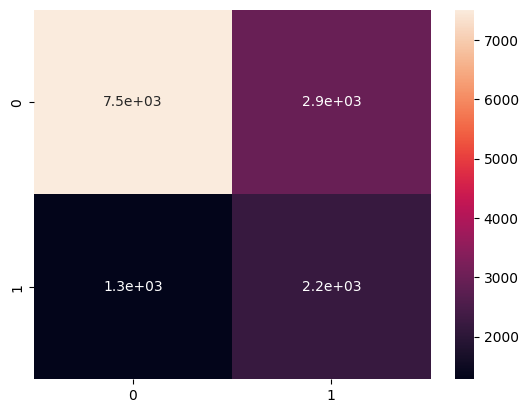

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_mat_result = confusion_matrix(y_pred,y_test)
sns.heatmap(confusion_mat_result,annot=True)

In [61]:
from sklearn.metrics import accuracy_score

accuracy=accuracy_score(y_test, y_pred)
print(accuracy)

0.6967825337546683


Ce point est appuyé par une accuracy d'environ 70% ce qui peut etre largement amelioré avec des hyperparametres bien choisis.

3.3 Entraîner et ajuster les paramètres de plusieurs modèles
Entraîner au moins quatre modèles différents et ajuster leurs hyperparamètres en utilisant GridSearchCV.

KNN Classifier Accuracy: 0.6369577707555301


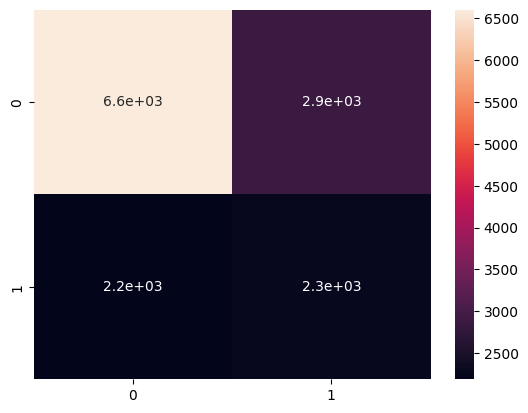

In [62]:
knn = KNeighborsClassifier(n_neighbors=3)

X_train_0 , X_test_0 ,y_train_0,y_test_0=train_test_split(X,y,test_size=0.25,random_state=0)
knn.fit(X_train_0,y_train_0)
y_pred_0=knn.predict(X_test_0)

confusion_mat_result_0 = confusion_matrix(y_pred_0,y_test_0)
sns.heatmap(confusion_mat_result_0, annot=True)

accuracy = accuracy_score(y_test_0, y_pred_0)
print("KNN Classifier Accuracy:", accuracy)


Decision tree Accuracy: 0.7606291295604711


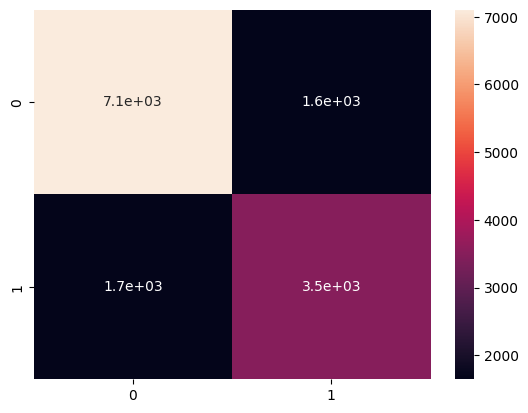

In [63]:
tree = DecisionTreeClassifier(max_depth=20)

X_train_1 , X_test_1 ,y_train_1,y_test_1=train_test_split(X,y,test_size=0.25,random_state=0)
tree.fit(X_train_1,y_train_1)
y_pred_1 = tree.predict(X_test_1)

confusion_mat_result_1 = confusion_matrix(y_pred_1,y_test_1)
sns.heatmap(confusion_mat_result_1, annot=True)

accuracy = accuracy_score(y_test_1, y_pred_1)
print("Decision tree Accuracy:", accuracy)

Random Forest Accuracy: 0.8257684573398448


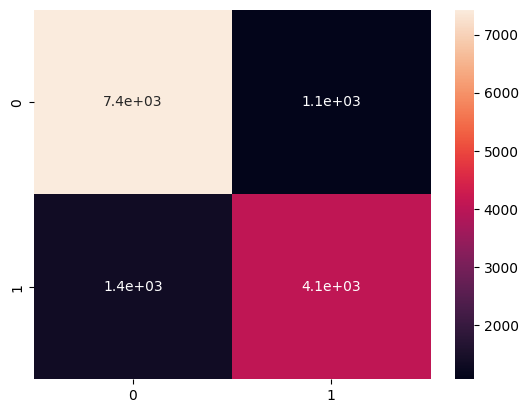

In [64]:
clf = RandomForestClassifier(max_depth=50, random_state=0)

X_train_2 , X_test_2 ,y_train_2,y_test_2=train_test_split(X,y,test_size=0.25,random_state=0)
clf.fit(X_train_2,y_train_2)
y_pred_2 = clf.predict(X_test_2)

confusion_mat_result_2 = confusion_matrix(y_pred_2,y_test_2)
sns.heatmap(confusion_mat_result_2, annot=True)

accuracy = accuracy_score(y_test_2, y_pred_2)
print("Random Forest Accuracy:", accuracy)

Gradient Boosting Accuracy: 0.7739873599540362


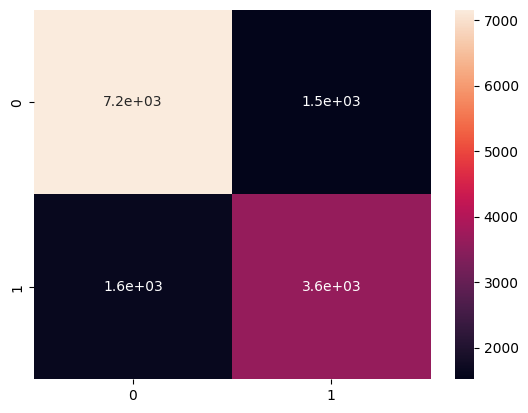

In [65]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=50, random_state=0)

X_train_3 , X_test_3 ,y_train_3,y_test_3=train_test_split(X,y,test_size=0.25,random_state=0)
clf.fit(X_train_3,y_train_3)
y_pred_3 = clf.predict(X_test_3)

confusion_mat_result_3 = confusion_matrix(y_pred_3,y_test_3)
sns.heatmap(confusion_mat_result_3, annot=True)

accuracy = accuracy_score(y_test_3, y_pred_3)
print("Gradient Boosting Accuracy:", accuracy)

Il faut faire jouer les hyperparametres pour obtenir une accuracy plus elevé sur les différents modeles testés, pour les KNN c'est le nombre de voisins.
Le decision tree joue lui sur la profondeur de l'arbre crée et les noeuds.
La profondeur de l'arbre aussi pour le random forest.
Et Pour le gradient boosting le nombre d'arbres du modele et la profondeur des ces derniers.

Modifier ces parametres a pour objectifs d'ameloirer la precision de l'algorithme afin d'etre le plus precis possible.



On a un meilleur resultat avec le Random forest et une max depth entre 30 et 60 et autour des 82 % d'accuracy.